In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch,set_seed
from bayes_opt.curve_compression import return_logistic_curve

from bayes_opt.sequentialBO.boil import BOIL

from tqdm import tqdm
import warnings


warnings.filterwarnings("ignore")

set_seed(1337)


W1116 16:26:25.371580  1232 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Specifying the search space

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)),("lr_actor", (1e-6,1e-2)),("lr_critic", (1e-6,1e-2)),
                      ('maxEpisodes',(200, 500))])

varParams = list(SearchSpace.keys())

# These are the fixed hyperparamters for DRL

In [3]:
fixedParams = OrderedDict([
        ("lr_actor", 5e-4),
        ("lr_critic", 5e-4),
        ("ent_coef", 0.01),
        ("maxSteps", 200),
        ("val_architecture", [32,32]),
        ("pol_architecture", [32,32])])

# Initializing the Advantage Actor Critic (A2C) on Reacher-v2 environment (require Mujoco license)

In [4]:
myfunction=drl_experiments.DRL_experiment("A2C", "Reacher-v2", varParams, fixedParams, SearchSpace)


# Initializing BOIL class

In [5]:
acq_name='ei_mu_max'

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initializing BOIL with 10 points

In [6]:
n_init_points=10
print("initialization {} points - please wait...".format(n_init_points))
boil.init(n_init_points)

initialization 10 points - please wait...


W1116 16:26:27.589440  1232 deprecation.py:506] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\ops\linalg\linear_operator_diag.py:166: calling LinearOperator.__init__ (from tensorflow.python.ops.linalg.linear_operator) with graph_parents is deprecated and will be removed in a future version.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


Max #augmented points 10 	 #augmented points  9 	 Augmented points:  [0.    0.098 0.206 0.349 0.5   0.637 0.761 0.9   1.   ]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []


# Running BOIL over multiple iterations

In [7]:
NN=10*myfunction.input_dim
print("Running BOIL for {} iterations".format(NN))
strFolderOut="run_experiments\plot"

for index in tqdm(range(0,NN)):
    boil.suggest_nextpoint()


Running BOIL for 40 iterations


  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [0.3617 0.5062 0.4237 0.0028] acq val=log(Utility/Cost)= -0.0955
[original scale] x=[0.8723 0.0051 0.0042] t=201 current y=35.59, ybest=356.07


  2%|██                                                                              | 1/40 [02:41<1:45:03, 161.64s/it]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [0.9811 0.579  0.0034 0.    ] acq val=log(Utility/Cost)= -0.2053
[original scale] x=[0.9962 0.0058 0.    ] t=200 current y=30.97, ybest=356.07


  5%|████                                                                            | 2/40 [05:22<1:42:10, 161.32s/it]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [0. 1. 0. 0.] acq val=log(Utility/Cost)= -0.6137
[original scale] x=[0.8  0.01 0.  ] t=200 current y=36.59, ybest=356.07


  8%|██████                                                                          | 3/40 [08:01<1:39:06, 160.71s/it]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [1. 0. 0. 0.] acq val=log(Utility/Cost)= -1.1022
[original scale] x=[1. 0. 0.] t=200 current y=31.49, ybest=356.07


 10%|████████                                                                        | 4/40 [10:39<1:35:55, 159.87s/it]

ln of conditioning number of GP covariance matrix 10.9
selected point from acq func: [0.7366 1.     0.     0.    ] acq val=log(Utility/Cost)= -1.4914
[original scale] x=[0.9473 0.01   0.    ] t=200 current y=33.80, ybest=356.07


 12%|██████████                                                                      | 5/40 [13:20<1:33:28, 160.25s/it]

ln of conditioning number of GP covariance matrix 10.9
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=-0.7 Logistic growth=1.0
selected point from acq func: [0.     1.     0.2346 0.6348] acq val=log(Utility/Cost)= -1.4779
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.01   0.0023] t=390 current y=279.99, ybest=356.07


 15%|████████████                                                                    | 6/40 [18:35<1:57:07, 206.69s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.0102 0.4185 0.2817 1.    ] acq val=log(Utility/Cost)= -1.787
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.802  0.0042 0.0028] t=500 current y=365.68, ybest=365.68


 18%|██████████████                                                                  | 7/40 [25:10<2:24:46, 263.24s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.2024 0.1786 0.5039 1.    ] acq val=log(Utility/Cost)= -2.1327
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8405 0.0018 0.005 ] t=500 current y=333.72, ybest=365.68


 20%|████████████████                                                                | 8/40 [31:47<2:41:47, 303.37s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0. 0. 0. 0.] acq val=log(Utility/Cost)= -1.9581
[original scale] x=[0.8 0.  0. ] t=200 current y=59.40, ybest=365.68


 22%|██████████████████                                                              | 9/40 [34:28<2:14:42, 260.72s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [1. 1. 1. 0.] acq val=log(Utility/Cost)= -2.2485
[original scale] x=[1.   0.01 0.01] t=200 current y=49.90, ybest=365.68


 25%|███████████████████▊                                                           | 10/40 [37:10<1:55:25, 230.86s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.     0.5735 0.     1.    ] acq val=log(Utility/Cost)= -2.4116
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0057 0.    ] t=500 current y=361.14, ybest=365.68


 28%|█████████████████████▋                                                         | 11/40 [43:47<2:15:39, 280.68s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0. 1. 1. 0.] acq val=log(Utility/Cost)= -2.376
[original scale] x=[0.8  0.01 0.01] t=200 current y=59.58, ybest=365.68


 30%|███████████████████████▋                                                       | 12/40 [46:28<1:54:18, 244.94s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [1. 0. 1. 0.] acq val=log(Utility/Cost)= -2.5266
[original scale] x=[1.   0.   0.01] t=200 current y=51.64, ybest=365.68


 32%|█████████████████████████▋                                                     | 13/40 [49:10<1:38:56, 219.88s/it]

ln of conditioning number of GP covariance matrix 11.5
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=-1.0 Logistic growth=1.0
selected point from acq func: [0.1237 0.8021 0.4294 1.    ] acq val=log(Utility/Cost)= -2.1623
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8247 0.008  0.0043] t=500 current y=350.82, ybest=365.68


 35%|███████████████████████████▋                                                   | 14/40 [55:55<1:59:22, 275.49s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.5875 0.0568 0.3254 1.    ] acq val=log(Utility/Cost)= -2.6692
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9175 0.0006 0.0033] t=500 current y=350.26, ybest=365.68


 38%|████████████████████████████▉                                                | 15/40 [1:02:32<2:09:58, 311.94s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.4613 0.     0.     1.    ] acq val=log(Utility/Cost)= -2.5997
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8923 0.     0.    ] t=500 current y=341.01, ybest=365.68


 40%|██████████████████████████████▊                                              | 16/40 [1:09:09<2:14:59, 337.49s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0. 0. 1. 0.] acq val=log(Utility/Cost)= -2.5557
[original scale] x=[0.8  0.   0.01] t=200 current y=79.69, ybest=365.68


 42%|████████████████████████████████▋                                            | 17/40 [1:11:51<1:49:12, 284.91s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.3236 0.2336 0.2473 1.    ] acq val=log(Utility/Cost)= -2.6678
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.144 0.342 0.526 0.714 0.872]
[original scale] x=[0.8647 0.0023 0.0025] t=462 current y=343.60, ybest=365.68


 45%|██████████████████████████████████▋                                          | 18/40 [1:18:32<1:57:14, 319.75s/it]

ln of conditioning number of GP covariance matrix 11.7
selected point from acq func: [0.     0.6947 0.2223 1.    ] acq val=log(Utility/Cost)= -2.6481
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0069 0.0022] t=500 current y=341.27, ybest=365.68


 48%|████████████████████████████████████▌                                        | 19/40 [1:25:09<2:00:02, 342.99s/it]

ln of conditioning number of GP covariance matrix 11.7
selected point from acq func: [1.     0.2806 0.1971 1.    ] acq val=log(Utility/Cost)= -2.7357
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.158 0.382 0.55  0.728 0.875]
[original scale] x=[1.     0.0028 0.002 ] t=462 current y=281.62, ybest=365.68


 50%|██████████████████████████████████████▌                                      | 20/40 [1:31:51<2:00:14, 360.72s/it]

ln of conditioning number of GP covariance matrix 11.8
selected point from acq func: [0.     0.2809 0.     1.    ] acq val=log(Utility/Cost)= -2.4505
Max #augmented points 10 	 #augmented points  7 	 Augmented points:  [0.    0.137 0.279 0.488 0.693 0.856 1.   ]
[original scale] x=[0.8    0.0028 0.    ] t=500 current y=356.11, ybest=365.68


 52%|████████████████████████████████████████▍                                    | 21/40 [1:38:33<1:58:05, 372.93s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.3205 1.     0.4707 1.    ] acq val=log(Utility/Cost)= -2.7284
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8641 0.01   0.0047] t=500 current y=356.95, ybest=365.68


 55%|██████████████████████████████████████████▎                                  | 22/40 [1:45:11<1:54:06, 380.34s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.3393 0.7222 0.8764 1.    ] acq val=log(Utility/Cost)= -2.8521
Max #augmented points 10 	 #augmented points  7 	 Augmented points:  [0.    0.132 0.246 0.47  0.684 0.855 1.   ]
[original scale] x=[0.8679 0.0072 0.0088] t=500 current y=349.16, ybest=365.68


 57%|████████████████████████████████████████████▎                                | 23/40 [1:51:52<1:49:33, 386.67s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.0888 1.     0.8742 1.    ] acq val=log(Utility/Cost)= -2.8899
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.177 0.442 0.576 0.75  0.872]
[original scale] x=[0.8178 0.01   0.0087] t=462 current y=347.10, ybest=367.56


 60%|██████████████████████████████████████████████▏                              | 24/40 [1:58:33<1:44:14, 390.93s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.     0.6875 0.9573 1.    ] acq val=log(Utility/Cost)= -2.6059
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8    0.0069 0.0096] t=500 current y=366.84, ybest=367.56


 62%|████████████████████████████████████████████████▏                            | 25/40 [2:05:10<1:38:12, 392.86s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.1062 0.7897 0.7954 1.    ] acq val=log(Utility/Cost)= -2.927
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8212 0.0079 0.008 ] t=500 current y=358.81, ybest=367.56


 65%|██████████████████████████████████████████████████                           | 26/40 [2:11:47<1:31:56, 394.03s/it]

ln of conditioning number of GP covariance matrix 11.9
selected point from acq func: [0.     0.8921 1.     1.    ] acq val=log(Utility/Cost)= -2.6519
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.168 0.408 0.567 0.737 0.872]
[original scale] x=[0.8    0.0089 0.01  ] t=462 current y=348.21, ybest=369.50


 68%|███████████████████████████████████████████████████▉                         | 27/40 [2:18:30<1:25:56, 396.66s/it]

ln of conditioning number of GP covariance matrix 12.0
selected point from acq func: [0.2653 1.     1.     1.    ] acq val=log(Utility/Cost)= -2.6832
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8531 0.01   0.01  ] t=500 current y=367.01, ybest=369.50


 70%|█████████████████████████████████████████████████████▉                       | 28/40 [2:25:07<1:19:20, 396.75s/it]

ln of conditioning number of GP covariance matrix 12.0
selected point from acq func: [1.     0.     0.6047 1.    ] acq val=log(Utility/Cost)= -3.1325
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.    0.    0.006] t=500 current y=298.33, ybest=369.50


 72%|███████████████████████████████████████████████████████▊                     | 29/40 [2:31:44<1:12:45, 396.90s/it]

ln of conditioning number of GP covariance matrix 12.0
selected point from acq func: [0.6053 0.216  1.     1.    ] acq val=log(Utility/Cost)= -3.2418
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9211 0.0022 0.01  ] t=500 current y=319.80, ybest=369.50


 75%|█████████████████████████████████████████████████████████▊                   | 30/40 [2:38:21<1:06:08, 396.88s/it]

ln of conditioning number of GP covariance matrix 12.0
selected point from acq func: [0.1436 0.7785 1.     1.    ] acq val=log(Utility/Cost)= -2.9266
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8287 0.0078 0.01  ] t=500 current y=367.47, ybest=369.50


 78%|█████████████████████████████████████████████████████████████▏                 | 31/40 [2:44:58<59:33, 397.08s/it]

ln of conditioning number of GP covariance matrix 12.0
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=1.8 Logistic growth=0.6
selected point from acq func: [0.0443 1.     0.5068 0.    ] acq val=log(Utility/Cost)= -0.1818
[original scale] x=[0.8089 0.01   0.0051] t=200 current y=33.15, ybest=369.50


 80%|███████████████████████████████████████████████████████████████▏               | 32/40 [2:48:00<44:19, 332.41s/it]

ln of conditioning number of GP covariance matrix 12.0
selected point from acq func: [0.    0.264 1.    1.   ] acq val=log(Utility/Cost)= -3.1646
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.159 0.385 0.552 0.729 0.874]
[original scale] x=[0.8    0.0026 0.01  ] t=462 current y=271.24, ybest=369.50


 82%|█████████████████████████████████████████████████████████████████▏             | 33/40 [2:54:41<41:11, 353.01s/it]

ln of conditioning number of GP covariance matrix 12.1
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=0.4 Logistic growth=0.9
selected point from acq func: [0.     0.6374 0.6887 0.    ] acq val=log(Utility/Cost)= -0.264
[original scale] x=[0.8    0.0064 0.0069] t=200 current y=33.33, ybest=369.50


 85%|███████████████████████████████████████████████████████████████████▏           | 34/40 [2:57:50<30:23, 303.90s/it]

ln of conditioning number of GP covariance matrix 12.1
selected point from acq func: [0. 1. 0. 1.] acq val=log(Utility/Cost)= -3.0977
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.186 0.473 0.574 0.762 0.869]
[original scale] x=[0.8  0.01 0.  ] t=461 current y=314.57, ybest=369.50


 88%|█████████████████████████████████████████████████████████████████████▏         | 35/40 [3:04:33<27:47, 333.45s/it]

ln of conditioning number of GP covariance matrix 12.1
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=1.7 Logistic growth=0.6
selected point from acq func: [0.2178 1.     0.1892 0.6597] acq val=log(Utility/Cost)= -2.2628
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8436 0.01   0.0019] t=398 current y=184.73, ybest=369.50


 90%|███████████████████████████████████████████████████████████████████████        | 36/40 [3:10:16<22:25, 336.30s/it]

ln of conditioning number of GP covariance matrix 12.1
selected point from acq func: [0.     1.     0.4651 1.    ] acq val=log(Utility/Cost)= -2.4809
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.178 0.443 0.576 0.751 0.871]
[original scale] x=[0.8    0.01   0.0047] t=461 current y=258.85, ybest=369.50


 92%|█████████████████████████████████████████████████████████████████████████      | 37/40 [3:16:56<17:46, 355.57s/it]

ln of conditioning number of GP covariance matrix 12.2
==estimated lengthscale_x=0.3000 lengthscale_t=0.600 Logistic midpoint=0.1 Logistic growth=0.9
selected point from acq func: [0.     0.6606 0.     0.    ] acq val=log(Utility/Cost)= -1.9632
[original scale] x=[0.8    0.0066 0.    ] t=200 current y=37.70, ybest=369.50


 95%|███████████████████████████████████████████████████████████████████████████    | 38/40 [3:20:01<10:08, 304.39s/it]

ln of conditioning number of GP covariance matrix 12.2
selected point from acq func: [0.3418 1.     0.7539 1.    ] acq val=log(Utility/Cost)= -2.8491
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8684 0.01   0.0075] t=500 current y=344.25, ybest=369.50


 98%|█████████████████████████████████████████████████████████████████████████████  | 39/40 [3:26:39<05:32, 332.40s/it]

ln of conditioning number of GP covariance matrix 12.3
selected point from acq func: [1.     0.2869 1.     1.    ] acq val=log(Utility/Cost)= -3.8102
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.144 0.34  0.526 0.714 0.873]
[original scale] x=[1.     0.0029 0.01  ] t=462 current y=260.21, ybest=369.50


100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [3:33:20<00:00, 352.99s/it]


# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


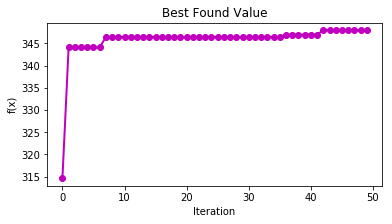

In [8]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Plot the training curve of the best found hyperparameter

Best found hyperparameter = [0.86471518 0.00233654 0.00247385]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

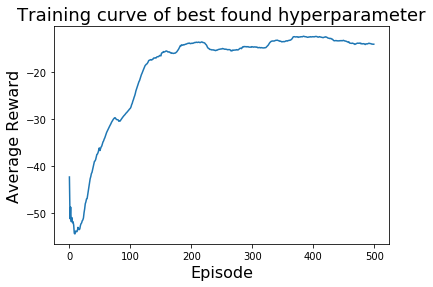

In [9]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
T_max=boil.SearchSpace[-1,1]

curve,time=myfunction.func([boil.X_original[idxMax,:-1],T_max])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Play the Reacher environment using the best found hyperparameter

In [13]:
boil.X_original[idxMax]

array([0.86471518, 0.00233654, 0.00247385])

# Plot the Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Log of Cond Number of Cov Matrix')

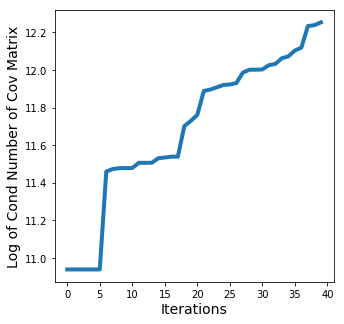

In [11]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Log of Cond Number of Cov Matrix',fontsize=14)

# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=0.1 $g_0$=0.9')

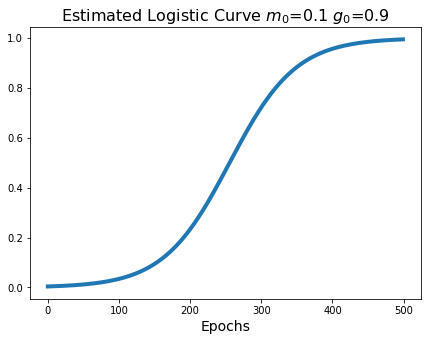

In [12]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)